<a href="https://colab.research.google.com/github/klmartinez/DSF/blob/main/activities/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learing Algorithm for Predicting Diabetes

Kiana Lee Martinez\
kianalee@arizona.edu\
last updated: 2022-11-23

In this Notebook I will be taking code from Hossein Faridnasr's [Diabetes Prediction & Model Selection Accuracy>83%](https://www.kaggle.com/code/hosseinfaridnasr/diabetes-prediction-model-selection-accuracy-83) and Carlos Lizarraga's [Introduction to Unsupervised Learning Algorithms](https://github.com/clizarraga-UAD7/Notebooks/blob/main/Intro_UnsupervisedLearning.ipynb).

# Loading necessary packages and our data

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
filename = "https://github.com/klmartinez/DSF/raw/main/activities/diabetes.csv"
# read in diabetes dataset
df = pd.read_csv(filename)

# Getting to know our dataset

In [ ]:
# look at the dimensionality of the datafame
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# generate descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# print info of df including index dtype & columns, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All of our features are numeric so there is no need for dealing with categorical features.

**Information on features:**

* **pregnancies**: the number of pregnancies
* **Glucose**: glucose level in blood
* **BloodPressure**: blood pressure measurement
* **SkinThickness**: thickness of the skin
* **Insulin**: insulin level in blood
* **BMI**: body mass index
* **DiabetesPedigreeFunction**: diabetes percentage
* **Age**: age in years
* **Outcome**: the final result is 1 Yes and 0 is no for having diabetes

In [ ]:
# check for null or duplicate values
print(f'number of duplicate rows: {df.duplicated().sum()}\nnumber of null values:\n{df.isna().sum()}')

number of duplicate rows: 0
number of null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Fortunately, there are no null or duplicate values in our dataset so we can continue.

## Exploratotry Data Analysis(EDA)

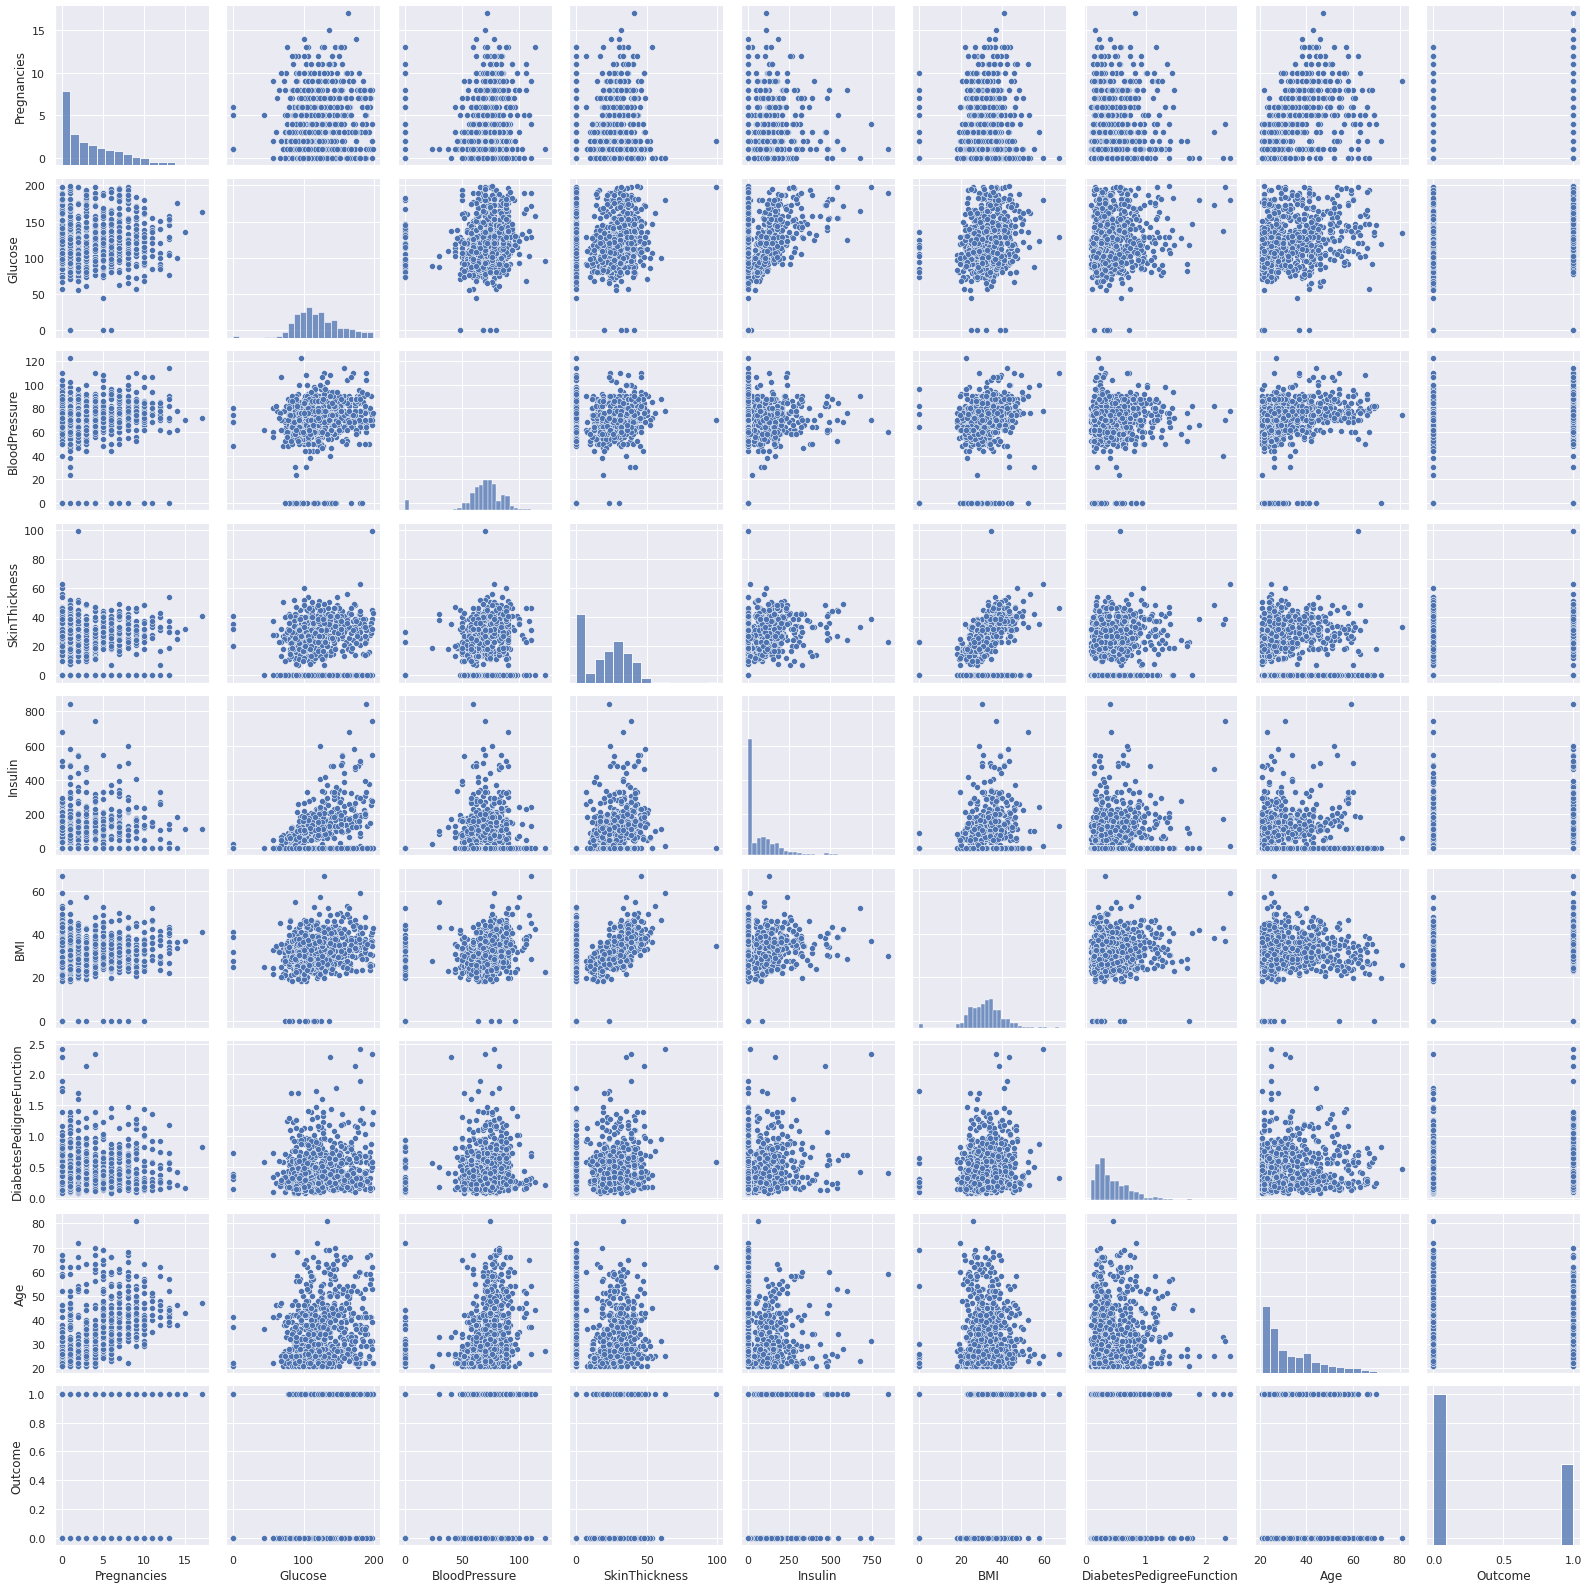

In [ ]:
# see a pair plot for different variables
sns.pairplot(df,palette = ["#8000ff","#da8829"])

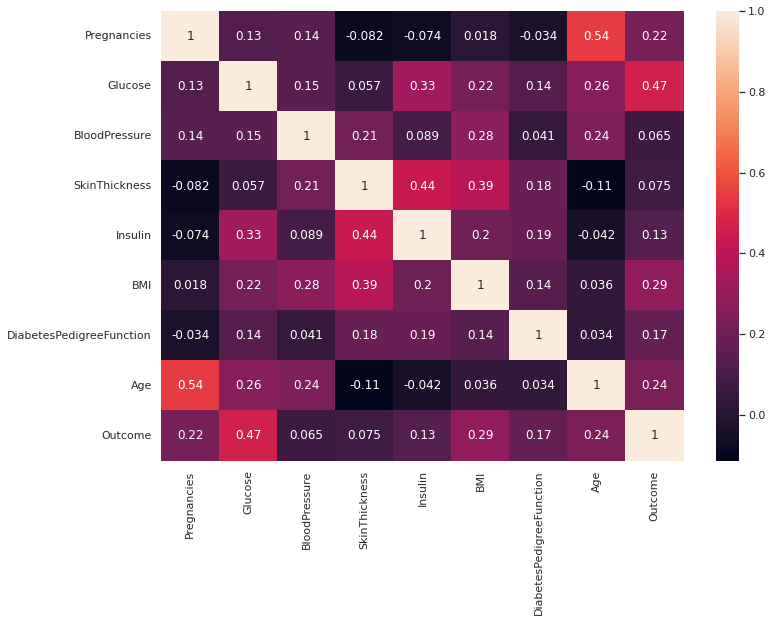

In [ ]:
# create a correlation matrix, aka a heatmap
sns.heatmap(df.corr(),annot=True)

It seems like the most correlated features are pregnancie with age, followed by glucose and outcome. Since we are most interested in diabetes outcomes we are going to ignore the relationship between pregnancies and age. Let's look more closesly at the relationshp between **outcome** and **glucose** which also biologically makes the  most sense.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


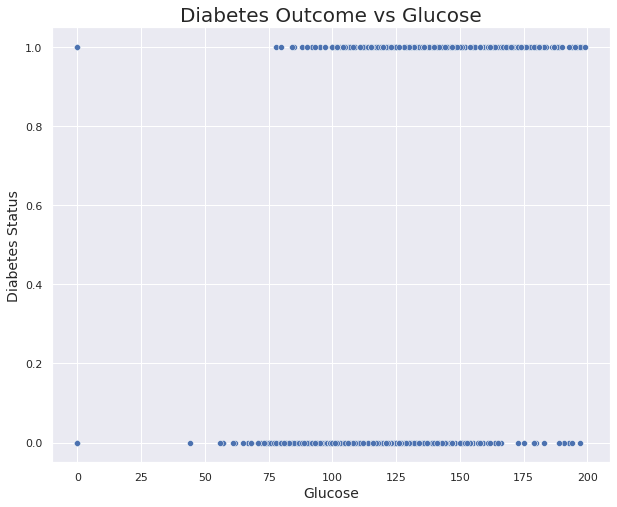

In [ ]:
# scatterplot of pregnancies with age
plt.figure(figsize=(10,8))

x = df['Glucose'].values
y = df['Outcome'].values
sns.scatterplot(x,y)
plt.title('Diabetes Outcome vs Glucose',fontsize=20)
plt.xlabel('Glucose',fontsize=14)
plt.ylabel('Diabetes Status',fontsize=14)
plt.show()

Even though outcome is coded as a numerical value, it is actually categorical since it is dichotomous, i.e. two outcomes - having diabetes and having no diabetes. Let's look at the relationshp between BMI, glucose, and diabetes outcome (0=no diabetes, 1=diabetes).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


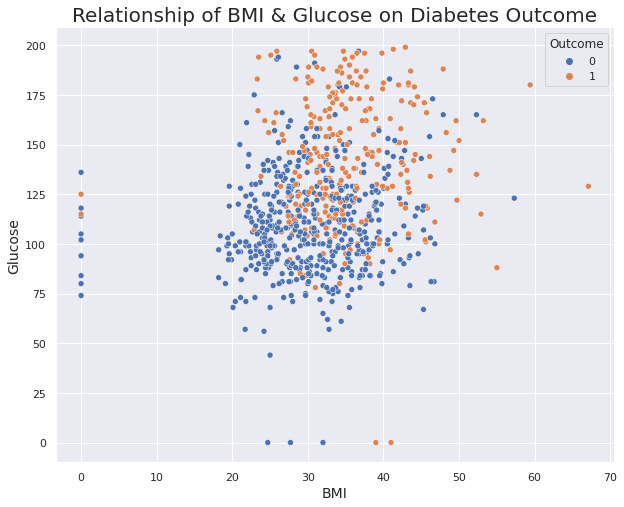

In [ ]:
# scatterplot of pregnancies with age
plt.figure(figsize=(10,8))

x = df['BMI'].values
y = df['Glucose'].values
color = df['Outcome']

sns.scatterplot(x,y,hue=color)
plt.title('Relationship of BMI & Glucose on Diabetes Outcome',fontsize=20)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Glucose',fontsize=14)
plt.show()

If one were to consider this graph, I would hypothesize taht glucose and BMI can be predictive of diabetes outcome.

# Modeling  
First of all, we split our dataset into a training and a test dataset.

In [ ]:
# splitting dataset to training and test
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Here we are going to define all of our models:

In [ ]:
# definte 8 different classifiers
lr_model = LogisticRegression(max_iter = 10000)
ridge_model = RidgeClassifier()
ridgecv_model = RidgeClassifierCV()
gpc = GaussianProcessClassifier()
tr = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
rf = RandomForestClassifier(max_depth=2)

The model_metrics function below returns useful metrics such as accuracy and f1_score in a dictionary format for each model.

In [ ]:
def model_metrics(model, X_test, y_test, decimals = 5):
    import numpy as np
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.round(accuracy_score(y_test, y_pred),decimals)
    pre = np.round(precision_score(y_test, y_pred),decimals)
    rec = np.round(recall_score(y_test, y_pred),decimals)
    f1 = np.round(f1_score(y_test, y_pred),decimals)
    auc = np.round(roc_auc_score(y_test, y_pred),decimals)
    return {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1_score': f1, 'auc': auc}

We combine the metrics for our models into a dataframe:

In [ ]:
results = pd.DataFrame(
    [
        model_metrics(lr_model, X_test, y_test),
        model_metrics(ridge_model, X_test, y_test),
        model_metrics(ridgecv_model, X_test, y_test),
        model_metrics(gpc, X_test, y_test),
        model_metrics(tr, X_test, y_test),
        model_metrics(knn, X_test, y_test),
        model_metrics(svc, X_test, y_test),
        model_metrics(rf, X_test, y_test)
    ], 
    index = ['LogisticRegression', 'RidgeClassifier', 'RidgeClassifierCV', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SupportVectorClassification', 'RandomForestClassifier']) \
.reset_index() \
.rename(columns={'index':'model'})

## Model Selection  
Now, Let's see which of our models has performed better!

In [ ]:
results.sort_values(['accuracy', 'f1_score', 'auc'],
              ascending = [False, False, False])

,model,accuracy,precision,recall,f1_score,auc
1,RidgeClassifier,0.83117,0.78378,0.61702,0.69048,0.77113
0,LogisticRegression,0.82468,0.76316,0.61702,0.68235,0.76645
2,RidgeClassifierCV,0.82468,0.76316,0.61702,0.68235,0.76645
6,SupportVectorClassification,0.79221,0.70270,0.55319,0.61905,0.72519
7,RandomForestClassifier,0.77273,0.73077,0.40426,0.52055,0.66942
4,DecisionTreeClassifier,0.76623,0.60784,0.65957,0.63265,0.73633
5,KNeighborsClassifier,0.72078,0.53846,0.59574,0.56566,0.68572
3,GaussianProcessClassifier,0.61688,0.38889,0.44681,0.41584,0.56920


Let's visualize the performance of our models:

Text(0.5, 1.0, 'Model Performance based on Accuracy')

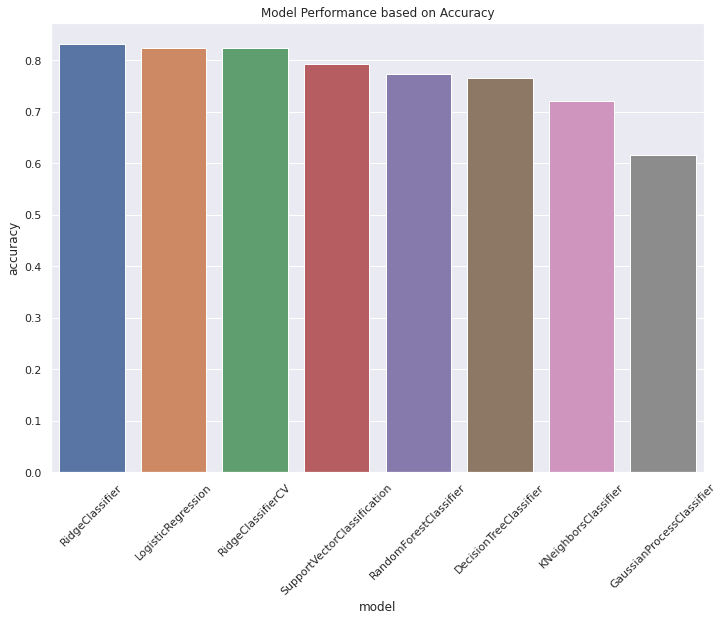

In [ ]:
results = results.sort_values('accuracy', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['accuracy']).set_title('Model Performance based on Accuracy')

Text(0.5, 1.0, 'Model Performance based on the f1_score')

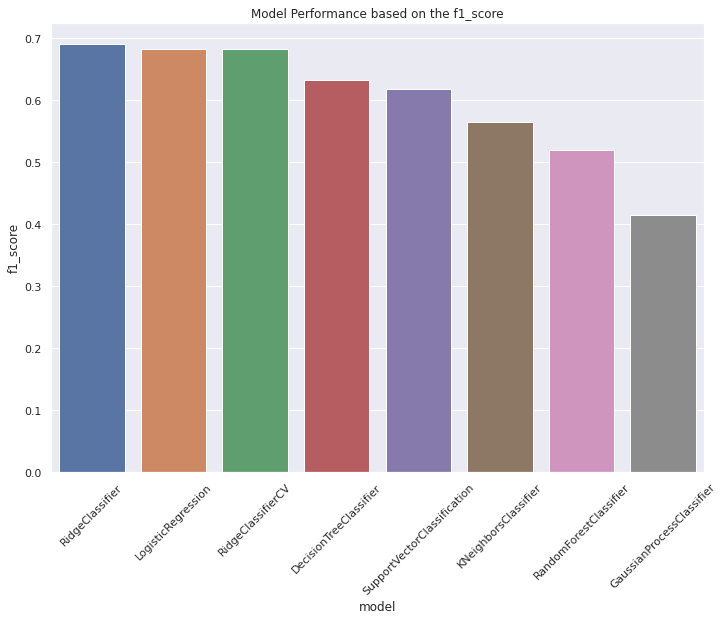

In [ ]:
results = results.sort_values('f1_score', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['f1_score']).set_title('Model Performance based on the f1_score')

Text(0.5, 1.0, 'Model Performance based on AUC(Area Under Curve)')

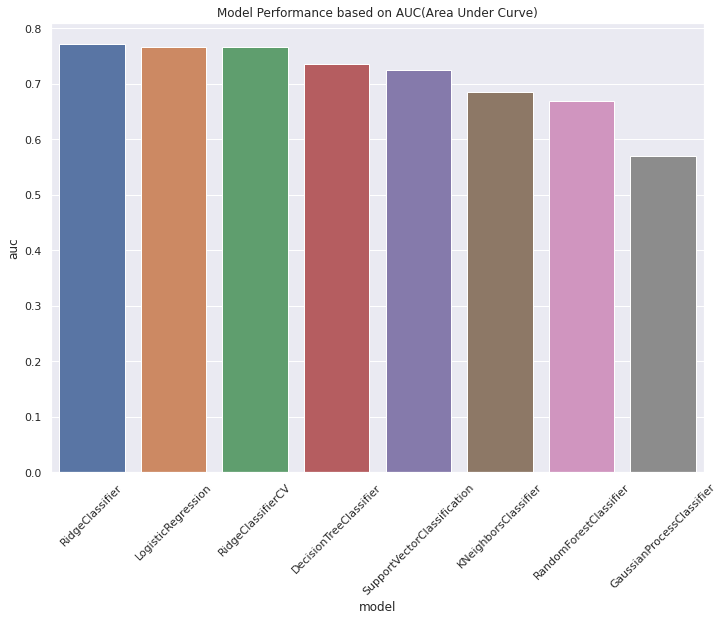

In [ ]:
results = results.sort_values('auc', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['auc']).set_title('Model Performance based on AUC(Area Under Curve)')

# Conclusions
It appears that the RidgeClassifier seems to perform the best since it had the best accuracy, F1_score, and AUC.The GaussianProcessClassifier performed the worst.

However, I am surprised that the **logistic regression** did not perform best since the outcome we want to predict is binary (having diabetes or not), as seen in the pairplots specific to "Outcome". 